### IMPORT LIBRARIES

In [2]:
# Data source: https://www.kaggle.com/datasets/unsdsn/world-happiness/data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import scipy.stats as stats
import numpy as np

### LOAD DATA

df1 represents 2018.csv, df2 represents 2019.csv

In [8]:
df1 = pd.read_csv("2018.csv")
df2 = pd.read_csv("2019.csv")

In [10]:
df1

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [12]:
df2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### DATA PREPROCESSING

In [15]:
print(df1.isna().values.any())
print(df2.isna().values.any())

True
False


Missing values in df1: determine which column it is

In [18]:
for i in df1.columns:
    print(f"{i}:{df1[i].isna().values.any()}")

Overall rank:False
Country or region:False
Score:False
GDP per capita:False
Social support:False
Healthy life expectancy:False
Freedom to make life choices:False
Generosity:False
Perceptions of corruption:True


Missing values in perceptions of corruption: replace NA value with mean of column

In [21]:
x = np.mean(df1['Perceptions of corruption'])
df1['Perceptions of corruption'] = df1['Perceptions of corruption'].fillna(x)

### DATA EXPLORATION

In [24]:
columns = ['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
x = range(1,7)

#### 2018

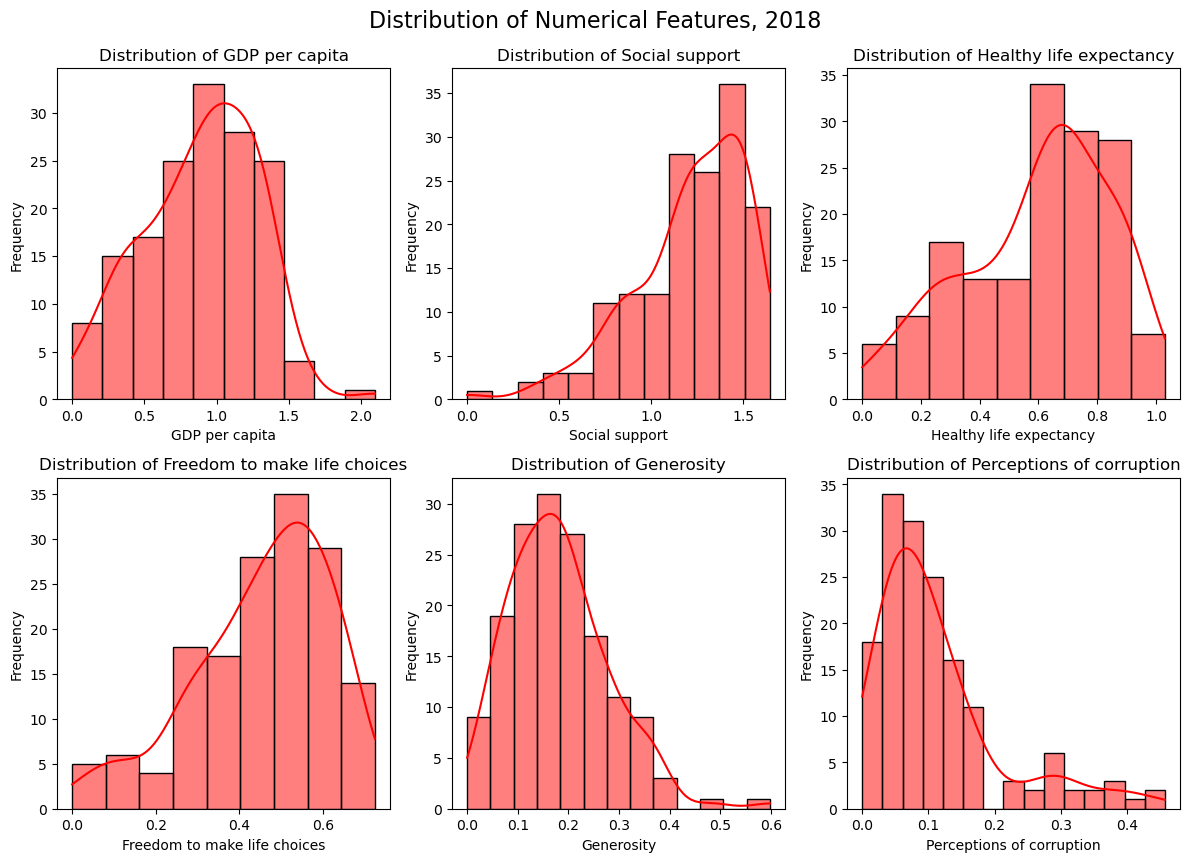

In [27]:
plt.figure(figsize=(12, 12))
pairs = zip(columns, x)
for column, i in pairs:
    plt.subplot(int(len(columns) / 3 + 1), 3, i)
    sb.histplot(df1[column], color='red', kde=True)
    plt.ylabel("Frequency")
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features, 2018", y=1.02, fontsize=16)
plt.show()

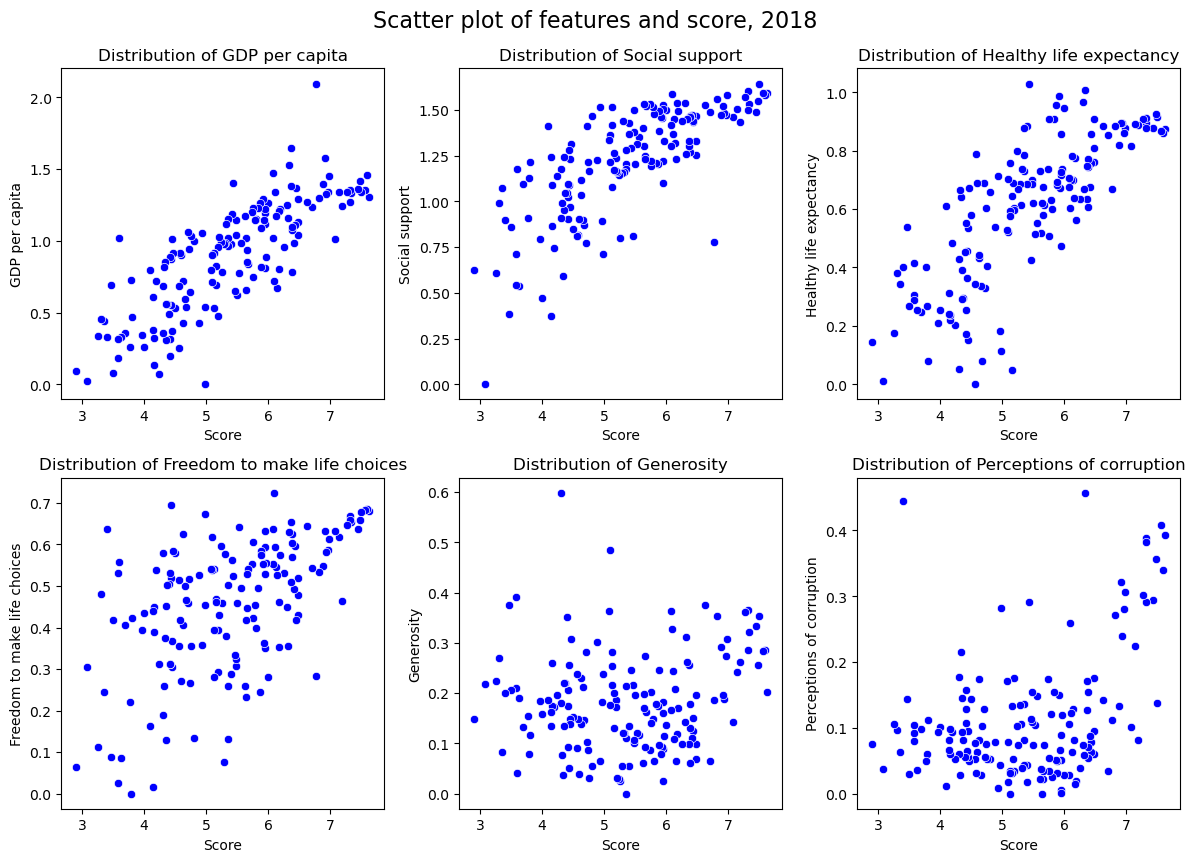

In [29]:
plt.figure(figsize=(12, 12))
pairs = zip(columns, x)
for column, i in pairs:
    plt.subplot(int(len(columns) / 3 + 1), 3, i)
    sb.scatterplot(x = df1['Score'], y = df1[column], color='blue')
    plt.ylabel(column)
    plt.xlabel("Score")
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.suptitle("Scatter plot of features and score, 2018", y=1.02, fontsize=16)
plt.show()

#### 2019

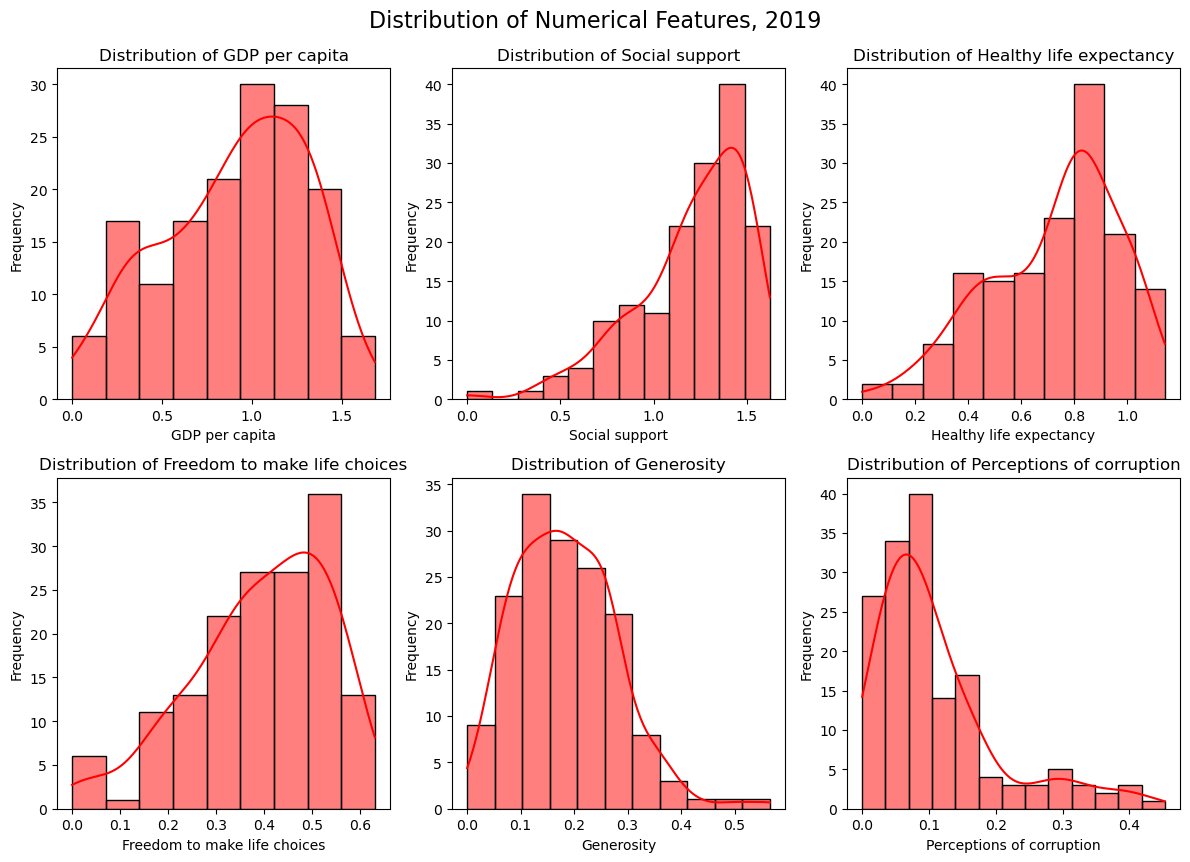

In [32]:
plt.figure(figsize=(12, 12))
pairs = zip(columns, x)
for column, i in pairs:
    plt.subplot(int(len(columns) / 3 + 1), 3, i)
    sb.histplot(df2[column], kde=True, color='red')
    plt.ylabel("Frequency")
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features, 2019", y=1.02, fontsize=16)
plt.show()

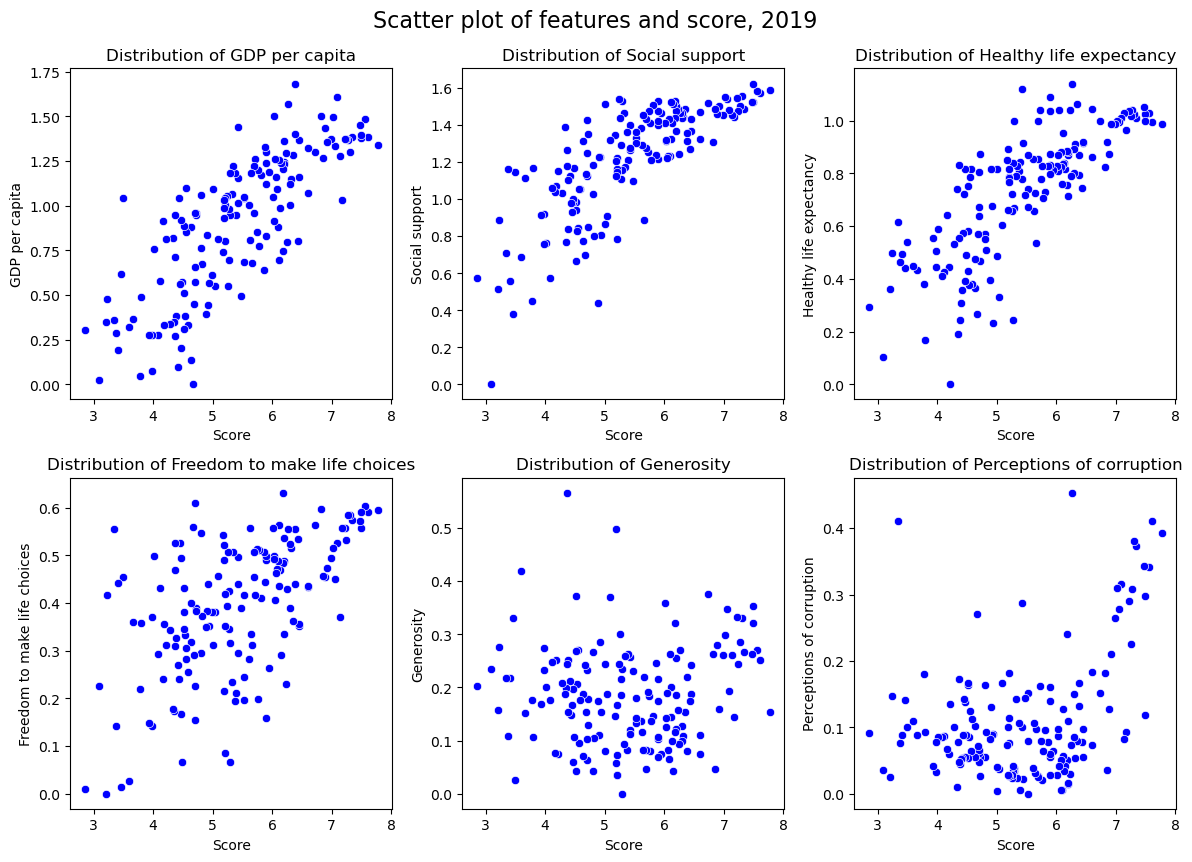

In [34]:
plt.figure(figsize=(12, 12))
pairs = zip(columns, x)
for column, i in pairs:
    plt.subplot(len(columns) // 3 + 1, 3, i)
    sb.scatterplot(x = df2['Score'], y = df2[column], color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel("Score")
    plt.ylabel(column)
plt.tight_layout()
plt.suptitle("Scatter plot of features and score, 2019", y=1.02, fontsize=16)
plt.show()

### DATA ANALYSIS

#### 2018

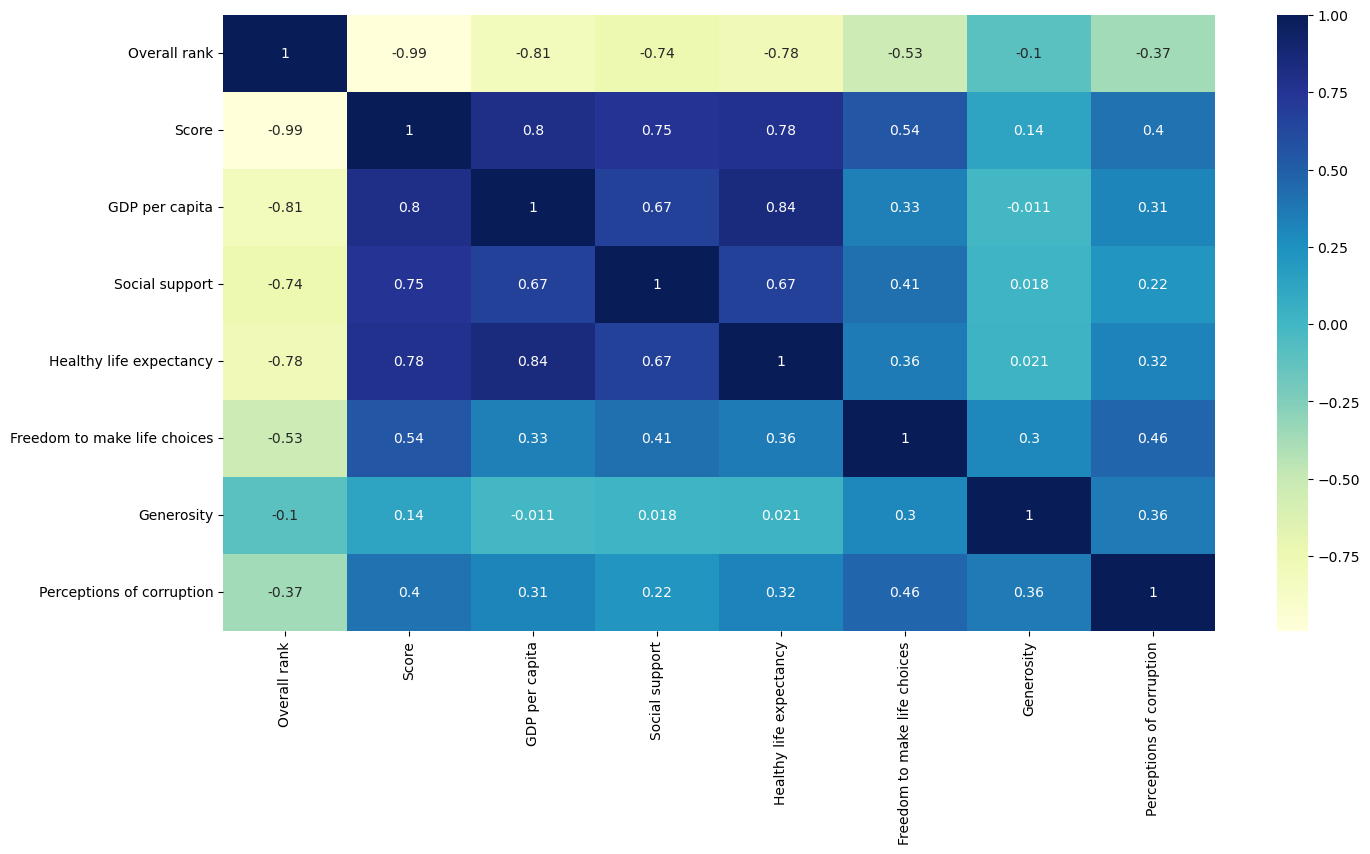

In [38]:
plt.figure(figsize=(16,8))
dataplot = sb.heatmap(df1.drop(columns = ['Country or region'], inplace = False).corr(numeric_only=True), cmap="YlGnBu", annot=True)

#### 2019

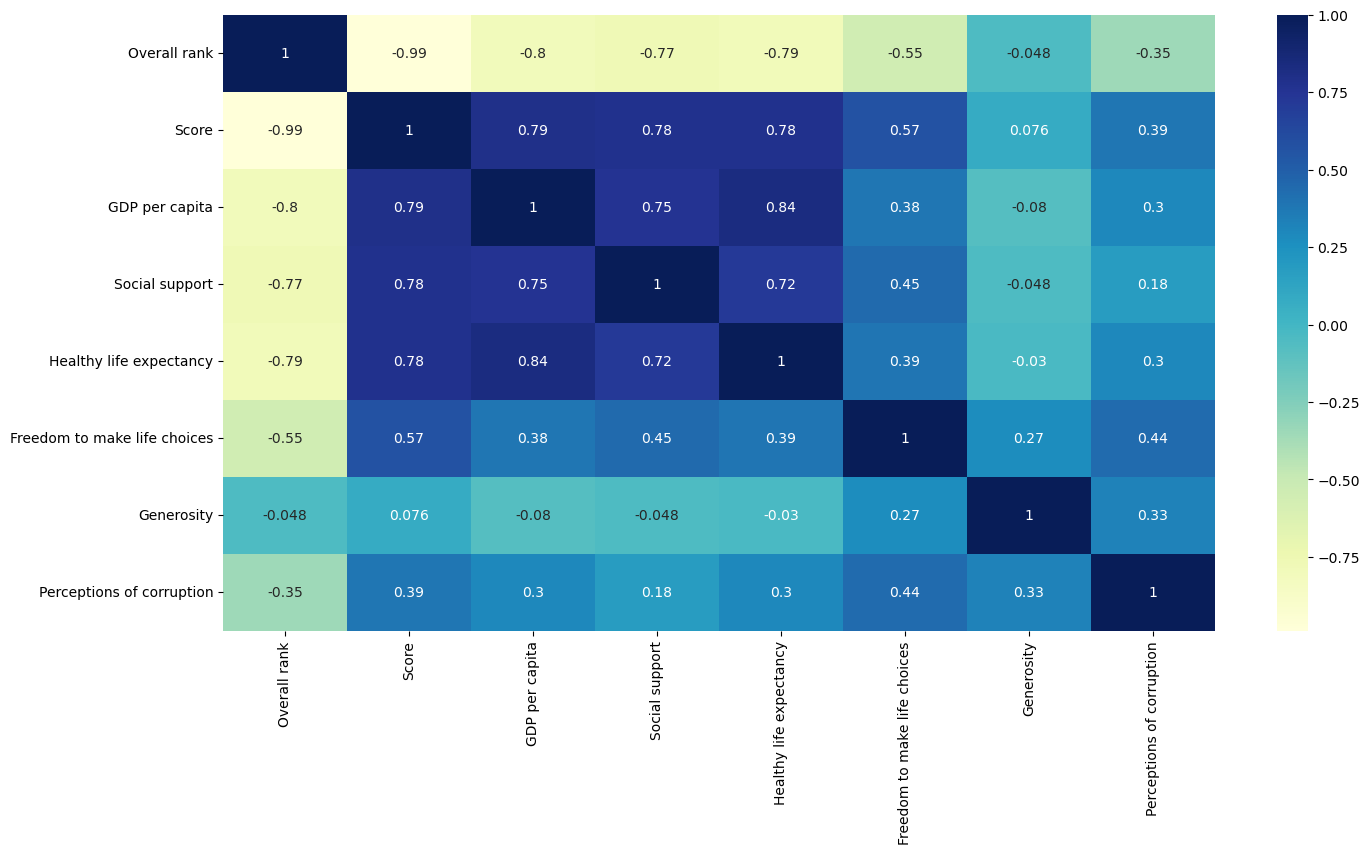

In [41]:
plt.figure(figsize=(16,8))
dataplot = sb.heatmap(df2.drop(columns = ['Country or region'], inplace = False).corr(numeric_only=True), cmap="YlGnBu", annot=True)

### EVALUATION

In [44]:
pval2018 = []
pval2019 = []
corr2018 = []
corr2019 = []
for i in columns:
    corr = df1['Score'].corr(df1[i])
    r, p_value = stats.pearsonr(df1['Score'], df1[i])
    pval2018.append(p_value)
    corr2018.append(corr)

for i in columns:
    corr = df2['Score'].corr(df2[i])
    r, p_value = stats.pearsonr(df2['Score'], df2[i])
    pval2019.append(p_value)
    corr2019.append(corr)

dd = {'Feature': columns, 'correlation 2018': corr2018, 'p-value 2018': pval2018, 'correlation 2019': corr2019, 'p-value 2019': pval2019}
eval = pd.DataFrame(data = dd)
eval

,Feature,correlation 2018,p-value 2018,correlation 2019,p-value 2019
0,GDP per capita,0.802124,2.626646e-36,0.793883,4.315481e-35
1,Social support,0.745760,5.878287e-29,0.777058,8.975120e-33
2,Healthy life expectancy,0.775814,1.307391e-32,0.779883,3.785454e-33
3,Freedom to make life choices,0.544280,2.074589e-13,0.566742,1.237924e-14
4,Generosity,0.135825,9.090351e-02,0.075824,3.468195e-01
5,Perceptions of corruption,0.403234,1.796884e-07,0.385613,6.654011e-07
